# Parallel processing

There is possibility to generate usecases profiles at the appliance level using parallel processing.


For example to generate 365 profiles using a parallel process in shell use the `-p` option



The following cells provide you with a way to use the parallel process in a pure python code

In [ ]:
from ramp import UseCase

import numpy as np
import random 
import math
import pandas as pd
from ramp.core.initialise import initialise_inputs
from ramp.core.utils import calc_time_taken, get_day_type
from ramp.core.core import User, UseCase
from ramp.core.stochastic_process import calc_peak_time_range
from ramp.post_process import post_process as pp


uc = UseCase() 
household = User(
    user_name = "Household",
    num_users = 10,
)
indoor_bulb = household.add_appliance(
    name = "Indoor Light Bulb",
    number = 6,
    power  = 7,
    num_windows = 2,
    func_time = 120,
    time_fraction_random_variability = 0.2,
    func_cycle = 10,
    window_1 = [1170,1440], # from 19:30 to 24:00
    window_2 = [0,30], # from 24 to 00:30
    random_var_w = 0.35,
)

uc.add_user(household)

num_profiles = 1
Profiles_list = []

days = pd.date_range(start="2022-01-01", end="2022-01-09")

peak_enlarge = 0.15

# Calculation of the peak time range, which is used to discriminate between off-peak
# and on-peak coincident switch-on probability, corresponds to step 1. of [1], p.6
peak_time_range = calc_peak_time_range(uc.users, peak_enlarge)



## Run usecase without parallel processing

Day 2022-01-01 00:00:00
Day 2022-01-02 00:00:00
Day 2022-01-03 00:00:00
Day 2022-01-04 00:00:00
Day 2022-01-05 00:00:00
Day 2022-01-06 00:00:00
Day 2022-01-07 00:00:00
Day 2022-01-08 00:00:00
Day 2022-01-09 00:00:00


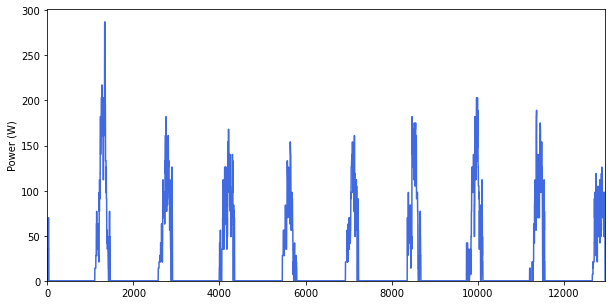

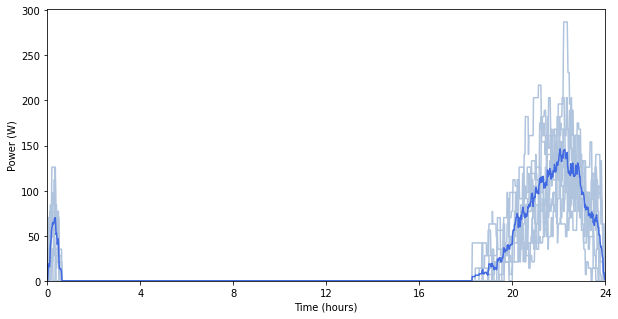

In [2]:
for day in days:
    print("Day", day)

    # without // processing
    daily_profiles = uc.generate_daily_load_profiles(num_profiles, peak_time_range, get_day_type(day))

    Profiles_list.append(np.mean(daily_profiles, axis=0))

# Post-processes the results and generates plots
Profiles_avg, Profiles_list_kW, Profiles_series = pp.Profile_formatting(Profiles_list)
pp.Profile_series_plot(Profiles_series)  # by default, profiles are plotted as a series

if len(Profiles_list) > 1:  # if more than one daily profile is generated, also cloud plots are shown
    pp.Profile_cloud_plot(Profiles_list, Profiles_avg)

## Run usecase with parallel processing

Computing appliances profiles: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 2093.11unit/s]


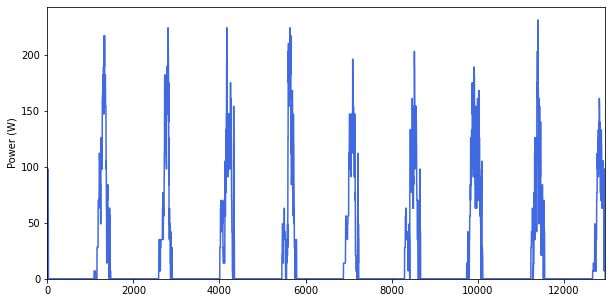

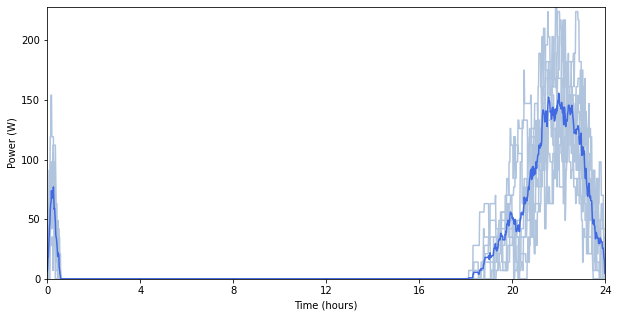

In [5]:

day_types = [get_day_type(day) for day in days] 

Profiles_list = uc.generate_daily_load_profiles_parallel(len(days), peak_time_range, day_types)

# Post-processes the results and generates plots
Profiles_avg, Profiles_list_kW, Profiles_series = pp.Profile_formatting(Profiles_list)
pp.Profile_series_plot(Profiles_series)  # by default, profiles are plotted as a series

if len(Profiles_list) > 1:  # if more than one daily profile is generated, also cloud plots are shown
    pp.Profile_cloud_plot(Profiles_list, Profiles_avg)

